In [1]:
import matplotlib.pyplot as plt
import numpy as np

# 학습데이터 준비

In [2]:
import tensorflow as tf
import tensorflow.keras.datasets as ds

In [3]:
print(tf.__version__)

2.17.0


## MNIST

In [4]:
# MNIST
(x_train,y_train),(x_test,y_test)=ds.mnist.load_data()

print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [5]:
# 학습 데이터 정규화
x_trainF = x_train.reshape(60000,784)   # 1차원 구조로 변경
x_testF = x_test.reshape(10000,784)

x_trainF = x_trainF.astype('float32')   # 0~1로 정규화하기 위해 실수형으로 변환
x_testF = x_testF.astype('float32')

x_trainF /= 255.0                       # 0~1로 정규화
x_testF /= 255.0

x_trainF.shape, x_testF.shape

((60000, 784), (10000, 784))

In [6]:
y_train10=tf.keras.utils.to_categorical(y_train,10)   # one-hot 인코딩
y_test10=tf.keras.utils.to_categorical(y_test,10)

y_train10.shape, y_test10.shape

((60000, 10), (10000, 10))

In [7]:
print(y_train[0], y_train10[0])

5 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## fashionMNIST

In [ ]:
# fashionMNIST
fashion_class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
(fx_train,fy_train),(fx_test,fy_test)=ds.fashion_mnist.load_data()

print(fx_train.shape, fy_train.shape, fx_test.shape, fy_test.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [ ]:
# 학습 데이터 정규화
fx_trainF = fx_train.reshape(60000,784) # 1차원 구조로 변경
fx_testF = fx_test.reshape(10000,784)

fx_trainF = fx_trainF.astype('float32') # 0~1로 정규화하기 위해 실수형으로 변환
fx_testF = fx_testF.astype('float32')

fx_trainF /= 255.0                      # 0~1로 정규화
fx_testF /= 255.0

fx_trainF.shape, fx_testF.shape

((60000, 784), (10000, 784))

In [ ]:
fy_train10=tf.keras.utils.to_categorical(fy_train,10)   # one-hot 인코딩
fy_test10=tf.keras.utils.to_categorical(fy_test,10)

fy_train10.shape, fy_test10.shape

((60000, 10), (10000, 10))

# k 최근접 이웃(kNN, k-Nearest Neighbor)

In [8]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

## MNIST

In [10]:
# 학습
clf = KNeighborsClassifier(n_neighbors=5)   # n_neighbors = k
clf.fit(x_trainF, y_train)

KNeighborsClassifier()

In [11]:
# 예측
y_pred = clf.predict(x_testF) #.reshape(10000, 784))
print(metrics.accuracy_score(y_test, y_pred))   # 정확하게 인식한 인식률

0.9688


In [12]:
clf.predict(x_testF[0].reshape(1, 784))

array([7], dtype=uint8)

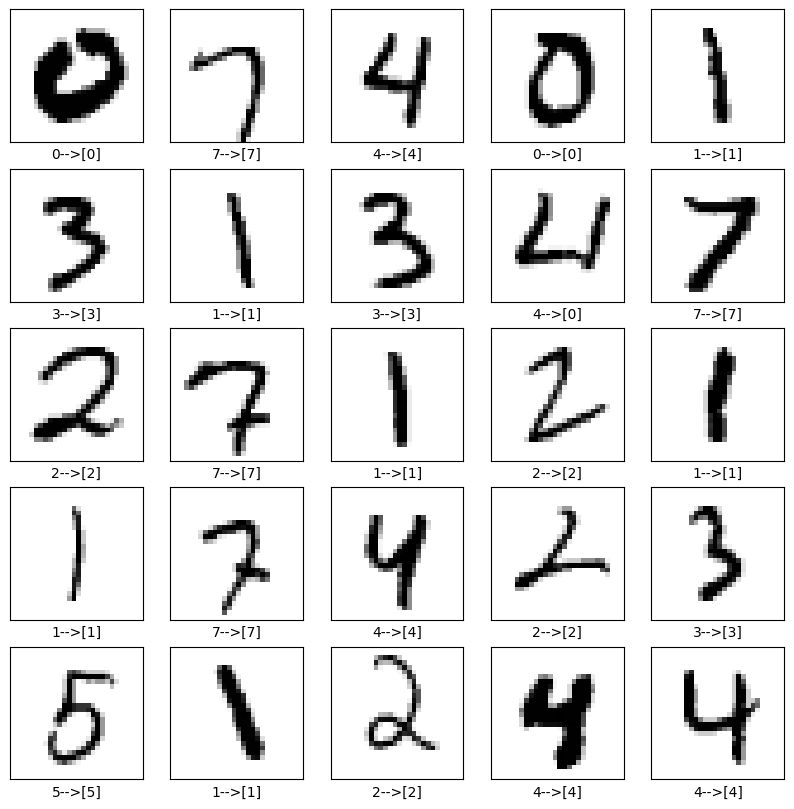

In [14]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i+25], cmap=plt.cm.binary)
    plt.xlabel(str(y_test[i+25]) + '-->' + str(clf.predict(x_testF[i+25].reshape(1, 784))))   # 실제값 --> [예측한 값]
plt.show()

In [15]:
# confuse matrix
cm = metrics.confusion_matrix(y_test, y_pred)   # 행: 실제 데이터 라벨, 열: 예측 데이터 라벨
print(cm)

[[ 974    1    1    0    0    1    2    1    0    0]
 [   0 1133    2    0    0    0    0    0    0    0]
 [  11    8  991    2    1    0    1   15    3    0]
 [   0    3    3  976    1   13    1    6    3    4]
 [   3    7    0    0  944    0    4    2    1   21]
 [   5    0    0   12    2  862    4    1    2    4]
 [   5    3    0    0    3    2  945    0    0    0]
 [   0   22    4    0    3    0    0  988    0   11]
 [   8    3    5   13    6   12    5    5  913    4]
 [   5    7    3    9    7    3    1   10    2  962]]


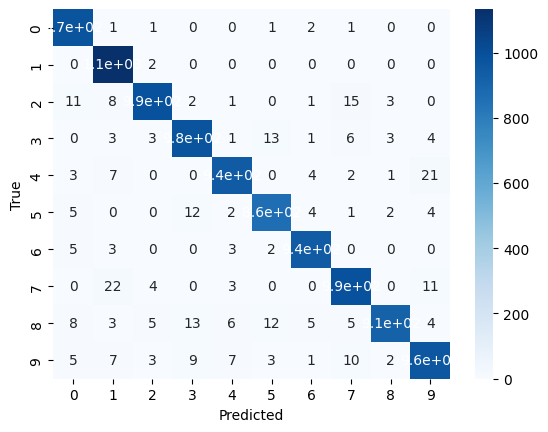

In [16]:
# confuse matrix 시각화
import seaborn as sns

sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## fashionMNIST

In [ ]:
# 학습
fclf = KNeighborsClassifier(n_neighbors= 5)
fclf.fit(fx_trainF, fy_train)

In [ ]:
# 예측
fy_pred = fclf.predict(fx_testF.reshape(10000, 784))
print(metrics.accuracy_score(fy_test, fy_pred))

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(fx_testF[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(str(fy_test[i])+'-'+fashion_class_names[fy_test[i]] + '-->' + str(fclf.predict(fx_testF[i].reshape(1, 784))))
plt.show()

In [ ]:
# confuse matrix
cm = metrics.confusion_matrix(fy_test, fy_pred)
print(cm)

# 서포트 벡터 머신(support vector machine)

In [17]:
from sklearn import metrics
from sklearn.svm import SVC

## MNIST

In [18]:
# 학습
clf_svm=SVC(kernel='rbf',gamma=0.3,C=1.0,random_state=1,max_iter=100)   # 학습 횟수(max_iter) 등에 따라 예측 정확도가 달라짐
clf_svm.fit(x_trainF,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(gamma=0.3, max_iter=100, random_state=1)

In [19]:
# 예측
y_pred_svm = clf_svm.predict(x_testF.reshape(10000, 784))
print(metrics.accuracy_score(y_test, y_pred_svm))   # 예측률

0.8511


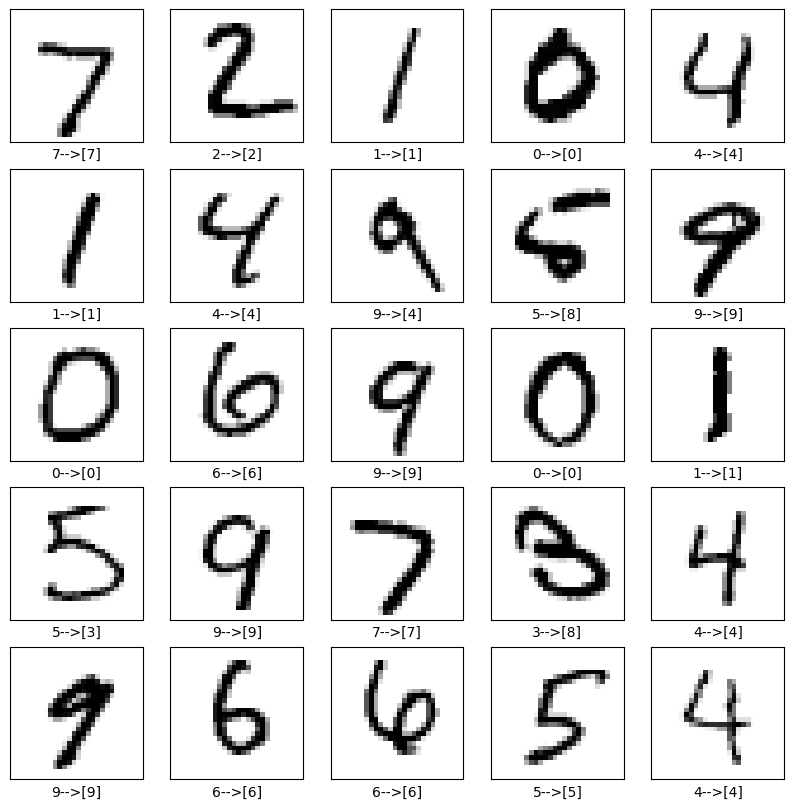

In [20]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_testF[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(str(y_test[i]) + '-->' + str(clf_svm.predict(x_testF[i].reshape(1, 784))))
plt.show()

In [ ]:
# confuse matrix
fcm = metrics.confusion_matrix(y_test, y_pred_svm)
print(fcm)

### + HOG 기술자

In [21]:
import cv2

imsize = 28 # size of image (28x28)
# HOG parameters:
winSize = (imsize, imsize) # 28, 28
blockSize = (imsize//2, imsize//2) # 14, 14
cellSize = (imsize//2, imsize//2) #14, 14
blockStride = (imsize//4, imsize//4) # 7, 7
nbins = 9
derivAperture = 1
winSigma = -1.0
histogramNormType = 0
L2HysThreshold = 0.2
gammaCorrection = 1
nlevels = 64
signedGradients = True

# define the HOG descriptor: 이미지를 HOG로 변환
hog = cv2.HOGDescriptor(winSize, blockSize, blockStride, cellSize, nbins, derivAperture, winSigma,
                        histogramNormType, L2HysThreshold, gammaCorrection, nlevels, signedGradients)

# compute HOG descriptors
x_train_hog = []
for i in range(x_train.shape[0]):
    descriptor = hog.compute(x_train[i]) # compute the HOG features: 81 길이의 HOG 특징 벡터 계산
    x_train_hog.append(descriptor) # append it to the train decriptors list

x_test_hog = []
for i in range(x_test.shape[0]):
    descriptor = hog.compute(x_test[i]) # compute the HOG features
    x_test_hog.append(descriptor) # append it to the test descriptors list

#train_descriptors = np.array(train_descriptors)
x_train_hog = np.resize(x_train_hog, (x_train.shape[0], 81))

#test_descriptors = np.array(test_descriptors)
x_test_hog = np.resize(x_test_hog, (x_test.shape[0], 81))

In [22]:
# 학습 - SVM classifier
clf_svm_hog=SVC(kernel='rbf',gamma=0.3,C=1.0) #,random_state=1,max_iter=300)
clf_svm_hog.fit(x_train_hog,y_train)

SVC(gamma=0.3)

In [23]:
# 예측 - SVM classifier
y_pred_svm_hog = clf_svm_hog.predict(x_test_hog)
print(metrics.accuracy_score(y_test, y_pred_svm_hog))

0.99


In [24]:
# confuse matrix
cm_hog = metrics.confusion_matrix(y_test, y_pred_svm_hog)
print(cm_hog)

[[ 976    0    1    0    0    1    1    1    0    0]
 [   0 1127    1    1    0    0    1    3    2    0]
 [   1    1 1025    0    0    0    0    5    0    0]
 [   0    0    1  999    0    3    0    4    2    1]
 [   0    0    0    0  975    0    1    1    0    5]
 [   1    0    0    6    0  883    1    0    1    0]
 [   3    2    2    0    0    2  947    0    2    0]
 [   0    2    6    1    0    0    0 1019    0    0]
 [   2    2    0    0    1    1    0    3  962    3]
 [   0    2    0    4    4    1    0    4    7  987]]
